# US Blueberry market analysis

TERMINAL MARKET

    Retail price
  

## Import and cleaning data

### Import data ship price border

In [185]:
# Importing libraries 
import pandas as pd 
from datetime import date

# Setting dates
# Date from
fday = '01'
fmonth = '01'
fyear = '2017'

# Date to : current date data to collect updated information
tday = date.today().strftime('%d')
tmonth = date.today().strftime('%m')
tyear = date.today().strftime('%Y')

# URL for accessing prices
USprices = f"https://www.marketnews.usda.gov/mnp/fv-report-top-filters\
?&commAbr=BLUBY&varName=&locAbr=&repType=shipPriceDaily\
&navType=byComm&locName=&navClass=&type=shipPrice&dr=1&volume=&commName=BLUEBERRIES&navClass,=&portal=fv&region=\
&repDate={fmonth}%2F{fday}%2F{fyear}&endDate={tmonth}%2F{tday}%2F{tyear}&format=excel&rebuild=false"
    
  
# Assign the table data in html format to a Pandas dataframe
table =  pd.read_html(USprices,header=0,parse_dates=['Date'])[0]
  
# Store the dataframe in Excel file to avoid html tags and save data source file
file_path = './Data/USMXprices.xls'
table.to_excel(file_path) 

# Read the Excel in a Pandas dataframe
prices = pd.DataFrame()
prices = pd.read_excel(file_path\
                    ,header=0
                    ,usecols= (['Commodity Name',\
                    'City Name',\
                    'Package',\
                    'Date',\
                    'Low Price',\
                    'High Price',\
                    'Mostly Low',\
                    'Mostly High',\
                    'Season']))

### Analyize data

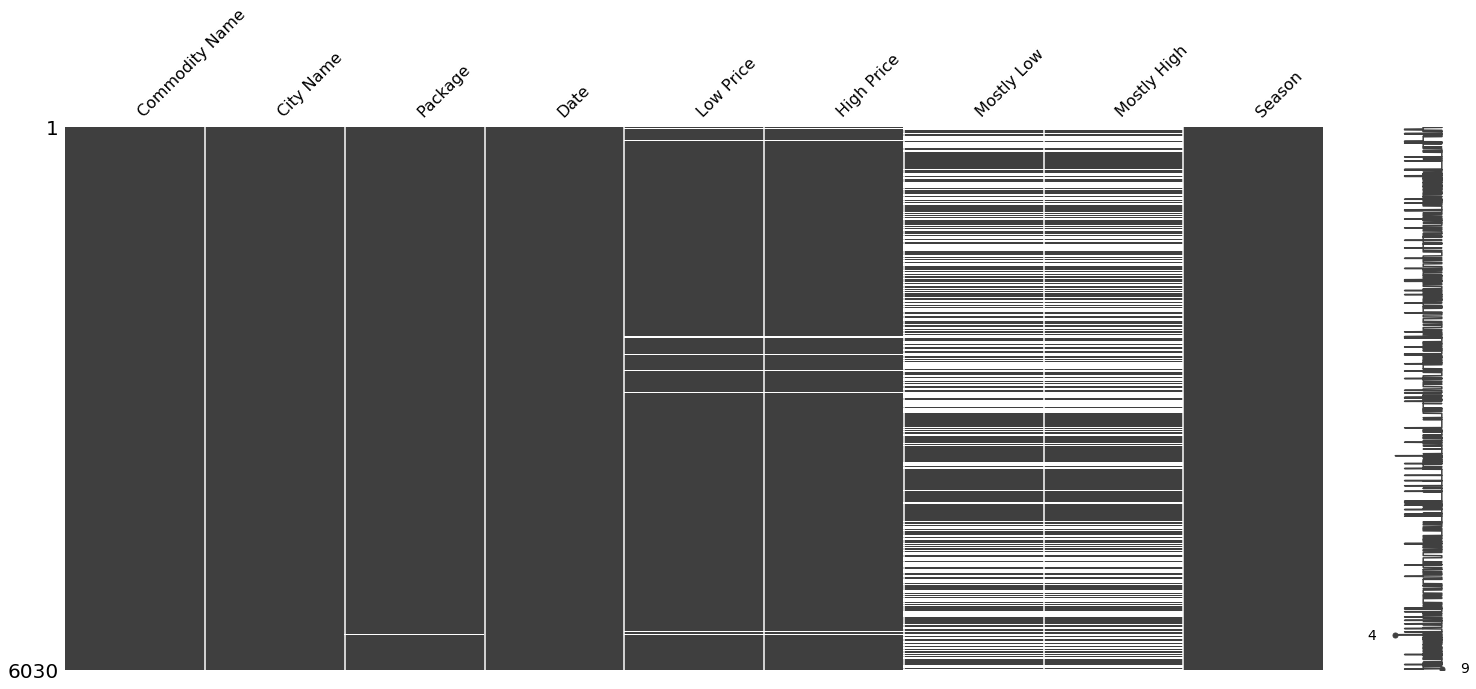

In [186]:
import missingno as msno
msno.matrix(prices)

In [187]:
prices.groupby('City Name')['Date'].nunique()

City Name
ARGENTINA IMPORTS - PORT OF ENTRY LOS ANGELES INTERNATIONAL AIRPORT        10
ARGENTINA/URUGUAY IMPORTS - PORTS OF ENTRY SOUTH FLORIDA                  127
ARGENTINA/URUGUAY IMPORTS - PORTS OF ENTRY SOUTHERN CALIFORNIA             18
BRITISH COLUMBIA CROSSINGS THROUGH NORTHWEST WASHINGTON                   139
CENTRAL & NORTH FLORIDA                                                   138
CHILE IMPORTS - PORT OF ENTRY LOS ANGELES AREA                            255
CHILE IMPORTS - PORT OF ENTRY MIAMI AREA                                  215
CHILE IMPORTS - PORT OF ENTRY PHILADELPHIA AREA                           254
EASTERN NORTH CAROLINA                                                    103
MEXICO CROSSINGS THROUGH ARIZONA, CALIFORNIA AND TEXAS                    566
MICHIGAN                                                                  145
OREGON AND WASHINGTON                                                     196
PERU IMPORTS - PORTS OF ENTRY PHILADELPHIA AREA AND NE

### Cleanance

<ul>
<li><input type="checkbox" disabled> Keep only imports from Mexico
<li><input type="checkbox" disabled> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [188]:
prices = prices[(prices['City Name']=='MEXICO CROSSINGS THROUGH ARIZONA, CALIFORNIA AND TEXAS') \
       & (prices['Low Price'].notnull()) & (prices['High Price'].notnull())]

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [189]:
prices['Avg Price'] = prices[['Low Price','High Price']].mean(axis=1)

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [190]:
prices.drop(axis=1, columns=['Low Price','High Price','City Name','Package','Mostly Low','Mostly High','Commodity Name','Season'],inplace=True)

In [191]:
prices.set_index('Date',inplace=True)

In [192]:
prices = prices.resample('D').fillna('nearest')

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

### Import data movement quantities

In [193]:
# URL for accessing quantities
USquantity =f"https://www.marketnews.usda.gov/mnp/fv-report-top-filters?\
&commAbr=BLUBY&varName=&locAbr=&repType=movementDaily\
&navType=byComm&locName=&navClass=&navClass=&type=movement&dr=1\
&volume=&commName=BLUEBERRIES&portal=fv&region=\
&repDate={fmonth}%2F{fday}%2F{fyear}&endDate={tmonth}%2F{tday}%2F{tyear}&format=excel&rebuild=false"
    
  
# Assign the table data in html format to a Pandas dataframe
table =  pd.read_html(USquantity,header=0,parse_dates=['Date'])[0]
  
# Store the dataframe in Excel file to avoid html tags and save data source file
file_path = './Data/USMXquantity.xls'
table.to_excel(file_path) 

# Read the Excel in a Pandas dataframe
quantity = pd.DataFrame()
quantity = pd.read_excel(file_path\
                    ,header=0)

In [194]:
quantity.head()

,Unnamed: 0,Commodity Name,Origin Name,Type,Package,Variety,Date,District,10000lb units,Trans Mode,Package Count,Car/Van Count,Season,Environment,Import/Export,Adjustments
0,0,BLUEBERRIES,ARGENTINA,NaN,NaN,NaN,2017-01-05,IMPORTS THROUGH MIAMI AIRPORT,0,Air,NaN,NaN,2016,NaN,Import,added for 01/05/2017 on 01/26/2017
1,1,BLUEBERRIES,ARGENTINA,NaN,NaN,NaN,2017-01-14,IMPORTS THROUGH OAKLAND,11,Boat,NaN,NaN,2016,NaN,Import,week ending amount
2,2,BLUEBERRIES,ARGENTINA,NaN,NaN,NaN,2017-07-22,IMPORTS THROUGH MIAMI AIRPORT,1,Air,NaN,NaN,2016,NaN,Import,week ending amount
3,3,BLUEBERRIES,ARGENTINA,NaN,NaN,NaN,2017-07-29,IMPORTS THROUGH WILMINGTON (DELAWARE),6,Boat,NaN,NaN,2016,NaN,Import,week ending amount
4,4,BLUEBERRIES,ARGENTINA,NaN,NaN,NaN,2017-08-19,IMPORTS THROUGH NEW YORK JFK AIRPORT,0,Air,NaN,NaN,2016,NaN,Import,added for week ending 08/19/2017 on 08/28/2017


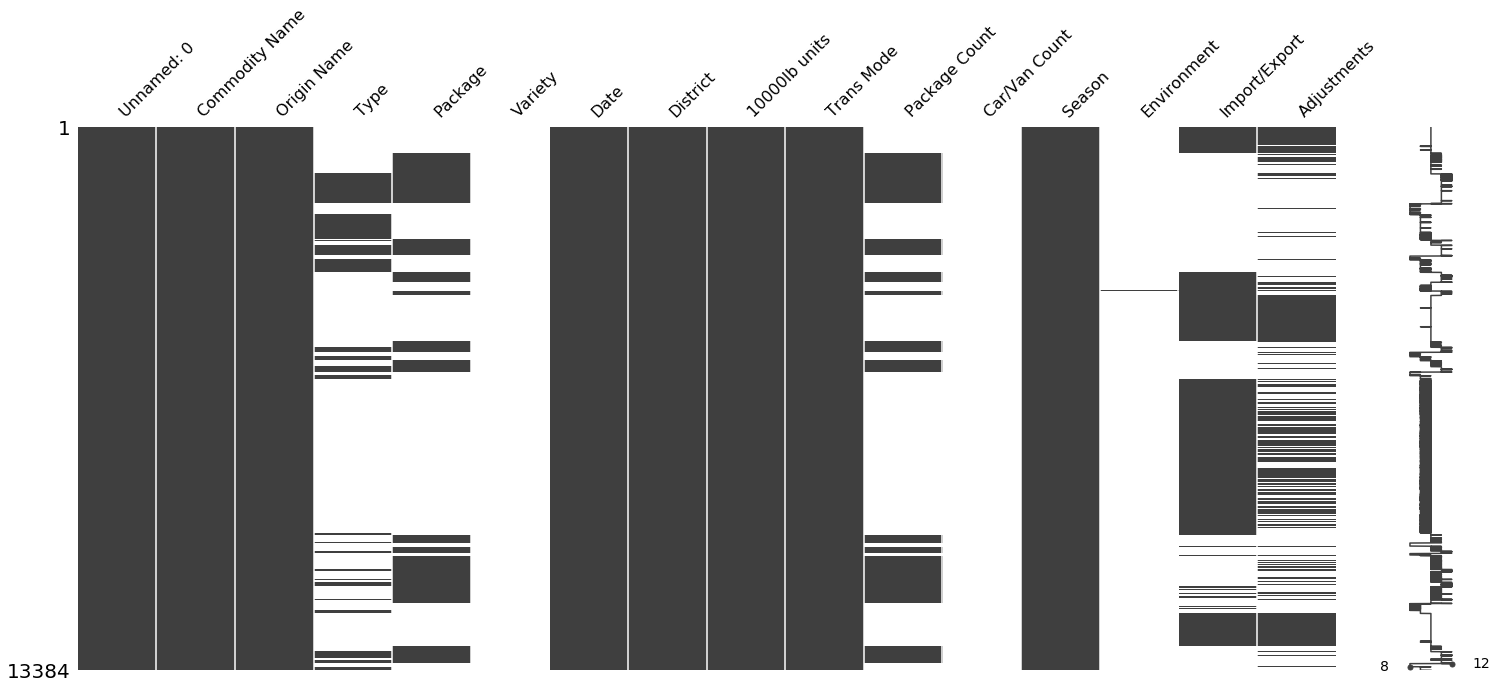

In [195]:
import missingno as msno
msno.matrix(quantity)

In [196]:
quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13384 entries, 0 to 13383
Data columns (total 16 columns):
Unnamed: 0        13384 non-null int64
Commodity Name    13384 non-null object
Origin Name       13384 non-null object
Type              3153 non-null object
Package           4482 non-null object
Variety           0 non-null float64
Date              13384 non-null datetime64[ns]
District          13384 non-null object
10000lb units     13384 non-null int64
Trans Mode        13384 non-null object
Package Count     4482 non-null float64
Car/Van Count     0 non-null float64
Season            13384 non-null int64
Environment       2 non-null object
Import/Export     7232 non-null object
Adjustments       6114 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 1.6+ MB


In [197]:
quantity.groupby('Origin Name')['Date'].nunique()

Origin Name
ARGENTINA              291
CALIFORNIA-CENTRAL     765
CALIFORNIA-SOUTH       582
CANADA                 246
CHILE                  480
FLORIDA                238
GEORGIA                231
GUATEMALA               21
MEXICO                1132
MICHIGAN               257
MOROCCO                  5
NETHERLANDS             15
NEW JERSEY             124
NEW ZEALAND              1
NORTH CAROLINA         196
OREGON                 278
PERU                   156
SOUTH AFRICA             1
UGANDA                   1
URUGUAY                117
WASHINGTON             269
Name: Date, dtype: int64

In [198]:
quantity = quantity[(quantity['Origin Name']=='MEXICO') \
       & (quantity['10000lb units'].notnull())]

In [199]:
quantity['10000lb units'].sum()

23243

In [200]:
quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 6244 to 10051
Data columns (total 16 columns):
Unnamed: 0        3808 non-null int64
Commodity Name    3808 non-null object
Origin Name       3808 non-null object
Type              50 non-null object
Package           0 non-null object
Variety           0 non-null float64
Date              3808 non-null datetime64[ns]
District          3808 non-null object
10000lb units     3808 non-null int64
Trans Mode        3808 non-null object
Package Count     0 non-null float64
Car/Van Count     0 non-null float64
Season            3808 non-null int64
Environment       0 non-null object
Import/Export     3808 non-null object
Adjustments       2368 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 505.8+ KB


In [201]:
quantity = quantity.groupby(['Date'])['10000lb units'].agg('sum').reset_index()

In [202]:
quantity.set_index('Date',inplace=True)

In [203]:
quantity.head()

,10000lb units
Date,
2017-01-02,21
2017-01-03,8
2017-01-04,23
2017-01-05,14
2017-01-06,16


In [204]:
quantity.shape

(1132, 1)

### Join prices and quantities

In [205]:
prices.shape

(1211, 1)

In [206]:
df = prices.join(quantity)

In [207]:
df = df.fillna(0)

In [208]:
df['Kg'] = df['10000lb units']*(0.453592*10000)

In [209]:
df['USDKg'] = df['Avg Price']*(0.0283495*72)

In [210]:
df ['USD'] = df['Kg'] * df['USDKg'] 

In [212]:
df.to_excel('resultpricesquantity.xlsx')

### Plotting

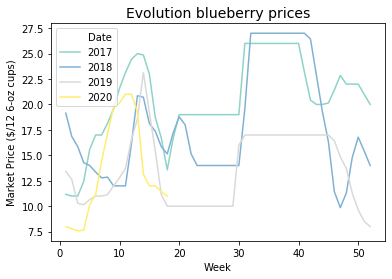

In [222]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
import datetime

plot_prices = prices.resample('W').mean()
ax = sns.lineplot(x = plot_prices.index.week,
                  y = plot_prices['Avg Price'],
                  hue = plot_prices.index.year,
                  data = plot_prices, palette = "Set3")
plt.title('Evolution blueberry prices', fontsize=14)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Market Price ($/12 6-oz cups)', fontsize=10)
plt.savefig('./Evolution_Blueberry_US.png')
plot_prices['Week_Num']=plot_prices.index.week
plot_prices.groupby('Week_Num').agg('count')
plt.show()

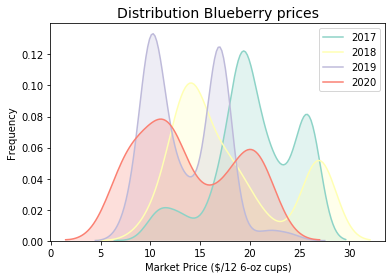

In [217]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plot_prices_na = plot_prices.fillna(-1)

with sns.color_palette("Set3",10):
    ax = sns.kdeplot(prices['Avg Price'].truncate(after='2018',before='2017'),label='2017', shade=True)
    ax = sns.kdeplot(prices['Avg Price'].truncate(after='2019',before='2018'),label='2018', shade=True)
    ax = sns.kdeplot(prices['Avg Price'].truncate(after='2020',before='2019'),label='2019', shade=True)
    ax = sns.kdeplot(prices['Avg Price'].truncate(after='2021',before='2020'),label='2020', shade=True)
    plt.title('Distribution Blueberry prices', fontsize=14)
    plt.xlabel('Market Price ($/12 6-oz cups)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig('./Distribution_Blueberry_US.png')
    plt.show()

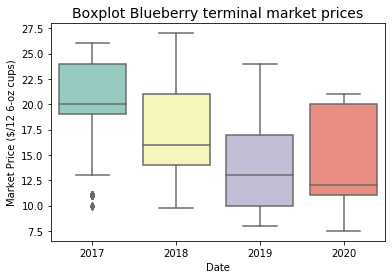

In [221]:
ax = sns.boxplot(x=prices.index.year,
                 y=prices['Avg Price'],
                 data=prices.truncate(before='1999',after='2010'), palette="Set3")
plt.title('Boxplot Blueberry terminal market prices', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Market Price ($/12 6-oz cups)', fontsize=10)
plt.savefig('./Boxplot_Blueberry_US.png')
plt.show()

### Modeling

#### Prepare data

In [10]:
import datetime
df_prices = prices_clean.resample('W').mean().reset_index()
df_prices['Year']=df_prices['Date'].dt.year
df_prices['Week']=df_prices['Date'].dt.week
df_prices.drop(df_prices[df_prices['Week']==53].index,axis=0, inplace=True)
import pandasql as ps
for y in range(1,11):
    q1 = """SELECT dfprev.[Avg Price] FROM df_prices dfcur
        LEFT JOIN df_prices dfprev 
        ON dfcur.Week = dfprev.Week AND dfprev.Year = (dfcur.Year - """+ str(y) +")"
    vname = 'Price-' + str(y)
    df_prices[vname] = ps.sqldf(q1, locals())


data = df_prices[['Avg Price','Price-1','Price-2','Price-3','Price-4',\
                  'Price-5','Price-6','Price-7','Price-8','Price-9','Price-10']]
data['Avg Price-mean'] = data[['Price-1','Price-2','Price-3','Price-4',\
                  'Price-5','Price-6','Price-7','Price-8','Price-9','Price-10']].mean(axis = 1) 
data.dropna(axis=0,how='all',inplace = True)
data.dropna(axis=1,how='all',inplace = True)
data.dropna(subset=['Avg Price'],inplace=True)
data.dropna(subset=['Avg Price-mean'],inplace=True)

/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matozqui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matozqui/a

#### Create model

#### Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
# Data Preparation
X = data[['Avg Price']] # pandas DataFrame
y = data['Avg Price-mean'] # pandas Series
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10)
# Load the library
from sklearn.linear_model import LinearRegression
# Create an instance of the model
reg = LinearRegression()
# Fit the regressor
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

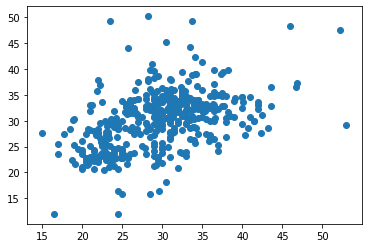

In [12]:
plt.scatter(X,y)

In [13]:
# Load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
# Fit only with training data
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Metrics model

In [14]:
import numpy as np

myMAPE = np.mean(np.abs(reg.predict(X_test) - y_test)/y_test)
myMAPE

0.13229468370359476

In [15]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(reg.predict(X_test), y_test)

3.790922887882674

In [16]:
from sklearn.metrics import mean_squared_error

# Use against predictions (we have to calculate the squared root of MSE)
np.sqrt(mean_absolute_error(reg.predict(X_test), y_test))

1.9470292467969437

In [17]:
np.corrcoef(reg.predict(X_test), y_test)[0][1]

0.4583951180043535

In [18]:
data.describe()

,Avg Price,Price-1,Price-2,Price-3,Price-4,Price-5,Price-6,Price-7,Price-8,Price-9,Price-10,Avg Price-mean
count,443.000000,308.000000,285.000000,282.000000,258.000000,250.000000,220.000000,222.000000,200.000000,191.000000,168.000000,443.000000
mean,29.623664,30.458834,29.866316,30.378147,30.579506,29.492550,30.006080,30.305236,30.849333,30.127705,31.120015,30.215458
std,5.921343,6.350200,6.801699,6.299766,6.458744,6.490766,6.748188,6.893841,6.862457,7.272080,7.036256,5.476942
min,15.000000,12.000000,12.000000,17.000000,17.000000,15.000000,15.000000,12.000000,15.750000,15.000000,15.750000,12.000000
25%,25.000000,25.537500,24.500000,25.375000,25.500000,24.500000,24.462500,25.000000,25.500000,24.300000,25.900000,26.546250
50%,30.000000,31.000000,30.000000,31.000000,31.000000,29.400000,30.000000,30.225000,30.950000,30.000000,31.025000,30.791667
75%,33.000000,34.062500,33.950000,33.928125,34.150000,33.000000,34.212500,34.500000,35.000000,34.250000,35.625000,33.560714
max,53.000000,52.166667,53.000000,53.000000,52.166667,52.166667,52.166667,51.250000,52.166667,52.166667,52.166667,50.208333


#### K neighbours

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Create an instance.
# Define number of neighbors.
# weights possible values: 'uniform', 'distance', [callable] user defined function
regk = KNeighborsRegressor(n_neighbors=2, weights = 'uniform')

# Train the data
regk.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [20]:
import numpy as np

myMAPE = np.mean(np.abs(regk.predict(X_test) - y_test)/y_test)
myMAPE

0.14199982100306768

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(regk.predict(X_test), y_test)

4.179511114785418

In [22]:
from sklearn.metrics import mean_squared_error

# Use against predictions (we have to calculate the squared root of MSE)
np.sqrt(mean_absolute_error(reg.predict(X_test), y_test))

1.9470292467969437

#### Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance.
regd = DecisionTreeRegressor (max_depth = 3,
                              min_samples_leaf=20)

# Train the data
regd.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
import numpy as np

myMAPE = np.mean(np.abs(regd.predict(X_test) - y_test)/y_test)
myMAPE

0.12448441726018934

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(regd.predict(X_test), y_test)

3.630204312862235

In [26]:
from sklearn.metrics import mean_squared_error

# Use against predictions (we have to calculate the squared root of MSE)
np.sqrt(mean_absolute_error(regd.predict(X_test), y_test))

1.905309505792231